# 911 Calls 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('911.csv')


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [3]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [4]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [5]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [12]:
df['title'].head()

0     EMS: BACK PAINS/INJURY
1    EMS: DIABETIC EMERGENCY
2        Fire: GAS-ODOR/LEAK
3     EMS: CARDIAC EMERGENCY
4             EMS: DIZZINESS
Name: title, dtype: object

In [9]:
df['Reason'] = df['title'].apply(lambda x:x.split(':')[0])

In [10]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

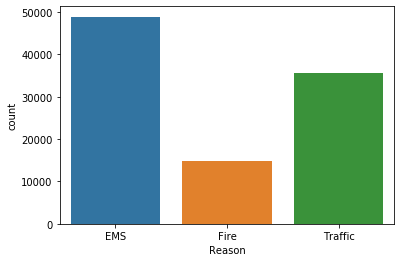

In [11]:
sns.countplot(data=df, x='Reason')

In [10]:
type(df['timeStamp'][0])

str

In [11]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [12]:
time = df['timeStamp'].iloc[0]

In [13]:
df['Hour'] = df['timeStamp'].apply(lambda x:x.hour)
df['Month'] = df['timeStamp'].apply(lambda x:x.month)
df['Day_of_Week'] = df['timeStamp'].apply(lambda x:x.dayofweek)


In [14]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day_of_Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3


** Notice how the Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week: **

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [15]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [16]:
df['Day_of_Week'] = df['Day_of_Week'].map(dmap)

** Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column. **

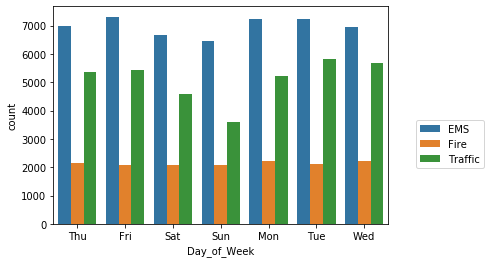

In [17]:
# from matplotlib import pylab
#pylab.legend(loc=9, bbox_to_anchor=(0.5, -0.1))
sns.countplot(data=df, x='Day_of_Week', hue='Reason')
plt.legend(bbox_to_anchor=(1.3,0.5))

**Now do the same for Month:**

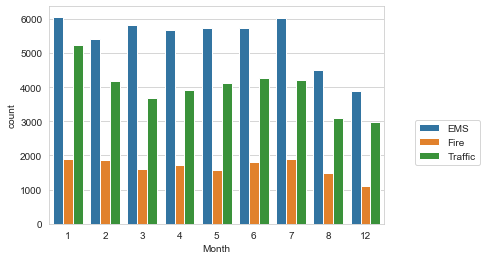

In [18]:
sns.set_style(style='whitegrid')
sns.countplot(data=df, x='Month', hue='Reason')
plt.legend(bbox_to_anchor=(1.3,0.5))

**Did you notice something strange about the Plot?**

_____

** You should have noticed it was missing some Months, let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas... **

** Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame. **

In [19]:
byMonth = df.groupby(by='Month').count()

In [20]:
byMonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day_of_Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


** Now create a simple plot off of the dataframe indicating the count of calls per month. **

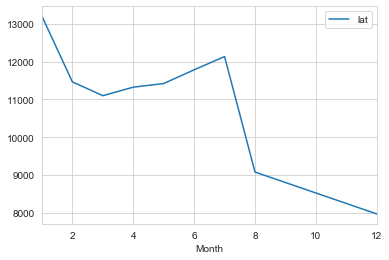

In [21]:
byMonth.plot(y='lat')

** Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column. **

In [22]:
byMonth['Month'] = byMonth.index.tolist()

In [23]:
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day_of_Week,Month
Month,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,1
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,2
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,3
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,4
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,5


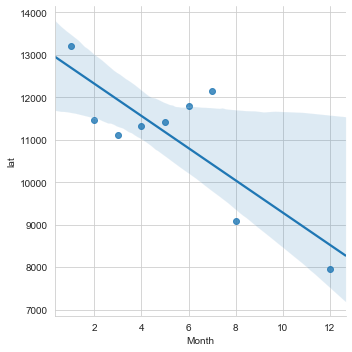

In [24]:
sns.lmplot(x='Month', y='lat', data=byMonth)

**Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method. ** 

In [25]:
df['Date'] = df['timeStamp'].apply(lambda x:x.date())

** Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

In [26]:
byDate = df.groupby(by='Date').count()

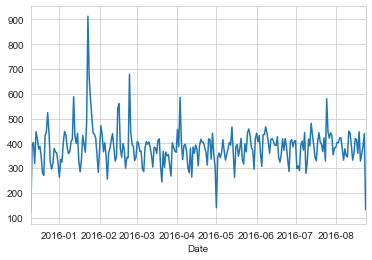

In [27]:
byDate.plot(y='lat', legend=False)
#plt.legend()

** Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

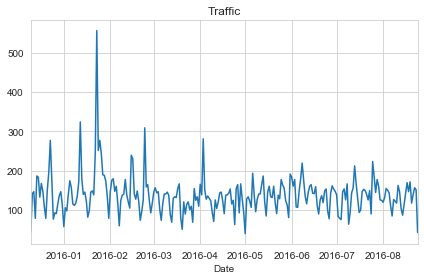

In [28]:
df[df['Reason']=='Traffic'].groupby('Date').count().plot(y='lat', legend=False, title='Traffic')
#plt.title('Traffic')
plt.tight_layout()

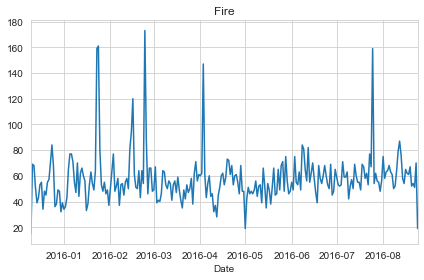

In [29]:
df[df['Reason']=='Fire'].groupby('Date').count().plot(y='lat', legend=False, title='Fire')
plt.tight_layout()

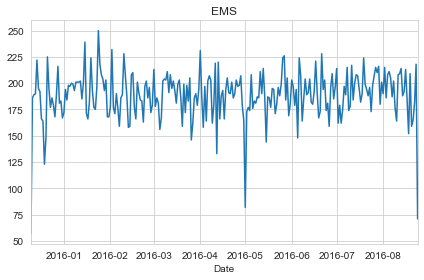

In [30]:
df[df['Reason']=='EMS'].groupby('Date').count().plot(y='lat', legend=False, title='EMS')
plt.tight_layout()

____
** Now let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I would recommend trying to combine groupby with an [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) method. Reference the solutions if you get stuck on this!**

In [31]:
new_df = df.groupby(by=['Day_of_Week','Hour']).count().unstack()['lat']

** Now create a HeatMap using this new DataFrame. **

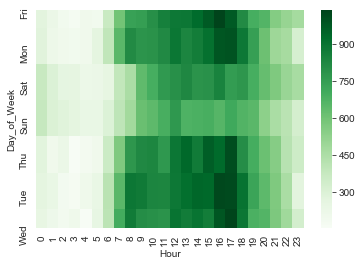

In [32]:
sns.heatmap(data = new_df, cmap='Greens')

** Now create a clustermap using this DataFrame. **

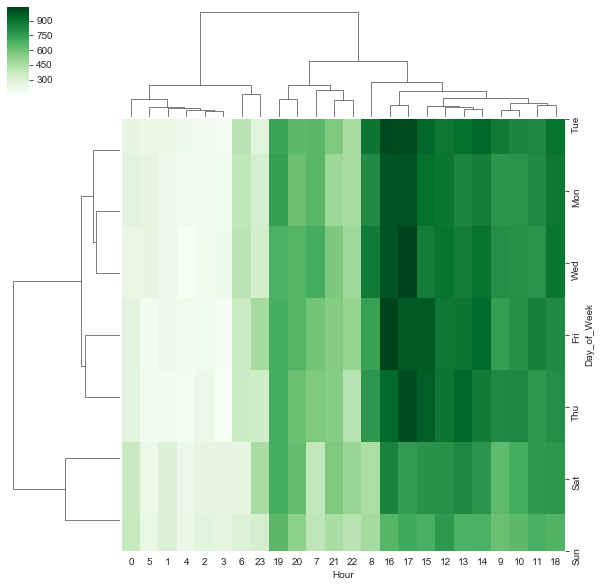

In [33]:
sns.clustermap(data=new_df, cmap='Greens')

** Now repeat these same plots and operations, for a DataFrame that shows the Month as the column. **

In [34]:
new_df_month = df.groupby(by=['Day_of_Week','Month']).count().unstack()['lat']

In [35]:
new_df_month.head()

Month,1,2,3,4,5,6,7,8,12
Day_of_Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


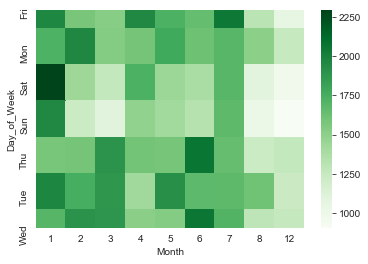

In [36]:
sns.heatmap(data=new_df_month, cmap='Greens')

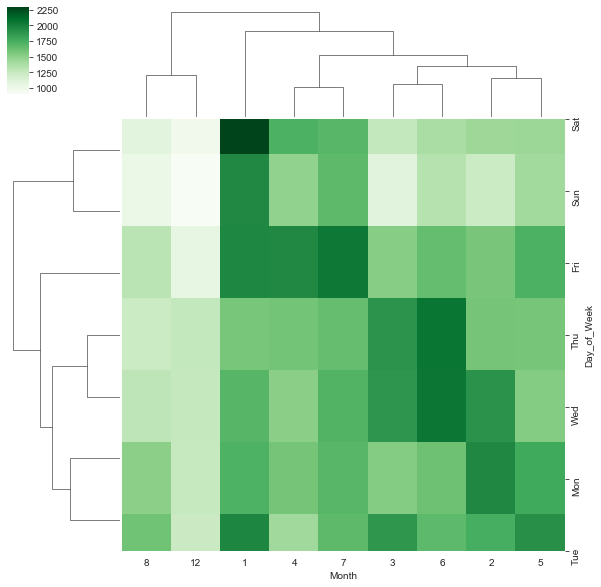

In [37]:
sns.clustermap(data=new_df_month, cmap='Greens')

**Continue exploring the Data however you see fit!**
# Great Job!